<a href="https://colab.research.google.com/github/Zahab163/fake-news-detection-ml-dl-transformers/blob/main/Fake_News_Detection_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake News Detection: Classical ML vs Deep Learning vs Transformers

## Objective
The goal of this notebook is to build and compare multiple approaches for fake news detection:
- **Baseline (Logistic Regression with TF‑IDF)** → establishes a classical machine learning benchmark.
- **Deep Learning (LSTM)** → explores sequence modeling with embeddings and recurrent networks.
- **Transformers (DistilBERT)** → fine‑tunes a state‑of‑the‑art pretrained language model.

By progressing from classical ML to modern NLP, this notebook demonstrates how different techniques perform on the same dataset, highlighting strengths, limitations, and practical trade‑offs.

##Uploading Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import nltk
nltk.download('stopwords')
nltk.download('punkt')
%matplotlib inline
from wordcloud import WordCloud
import re
seaborn=sns.color_palette('pastel')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


##Upload Data

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("emineyetm/fake-news-detection-datasets")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'fake-news-detection-datasets' dataset.
Path to dataset files: /kaggle/input/fake-news-detection-datasets


labelling

In [4]:
fake_df = pd.read_csv('/kaggle/input/fake-news-detection-datasets/News _dataset/Fake.csv')
true_df = pd.read_csv('/kaggle/input/fake-news-detection-datasets/News _dataset/True.csv')

Frist, visualizing the distribution and word cloud of the data ..(We could skip this part but it makes data more understandable and enjoyable)

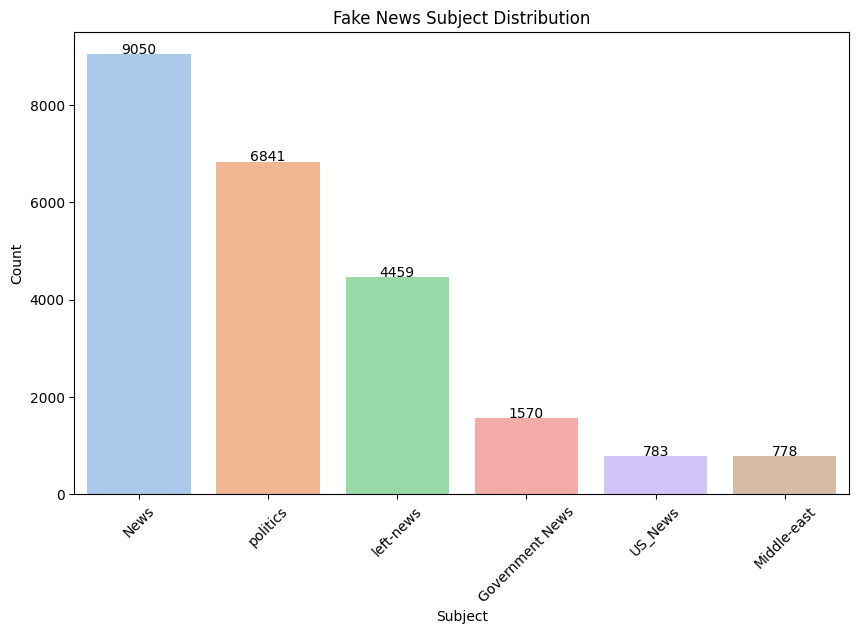

In [5]:
subject_counts = fake_df['subject'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=subject_counts.index, y=subject_counts.values, hue=subject_counts.index, palette=sns.color_palette('pastel', 6), legend=False)
plt.title('Fake News Subject Distribution')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)

for index, value in enumerate(subject_counts):
    plt.text(index, value + 10, str(value), ha='center' )


plt.show()

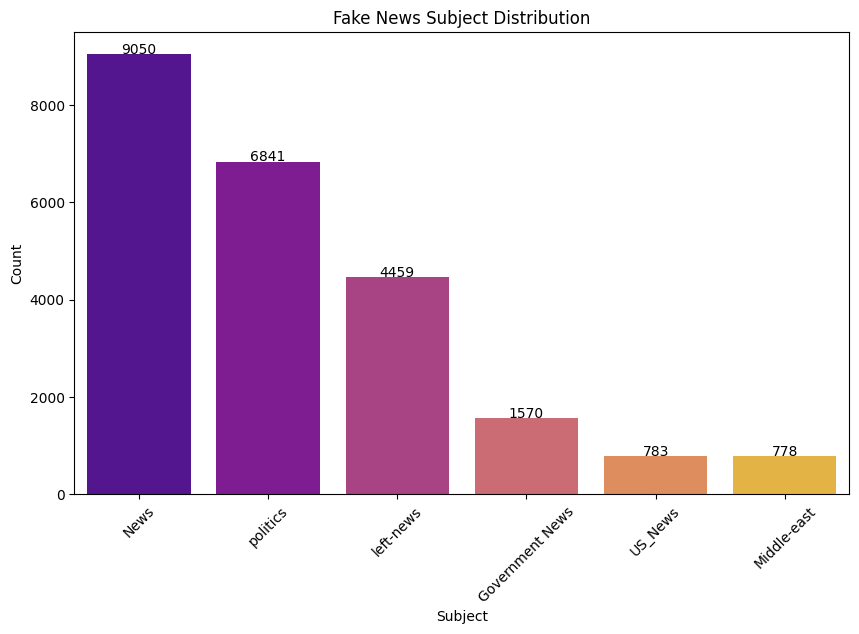

In [6]:
subject_counts = fake_df['subject'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=subject_counts.index, y=subject_counts.values, hue=subject_counts.index, palette='plasma', legend=False)
plt.title('Fake News Subject Distribution')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)

for index, value in enumerate(subject_counts):
    plt.text(index, value + 10, str(value), ha='center' )


plt.show()

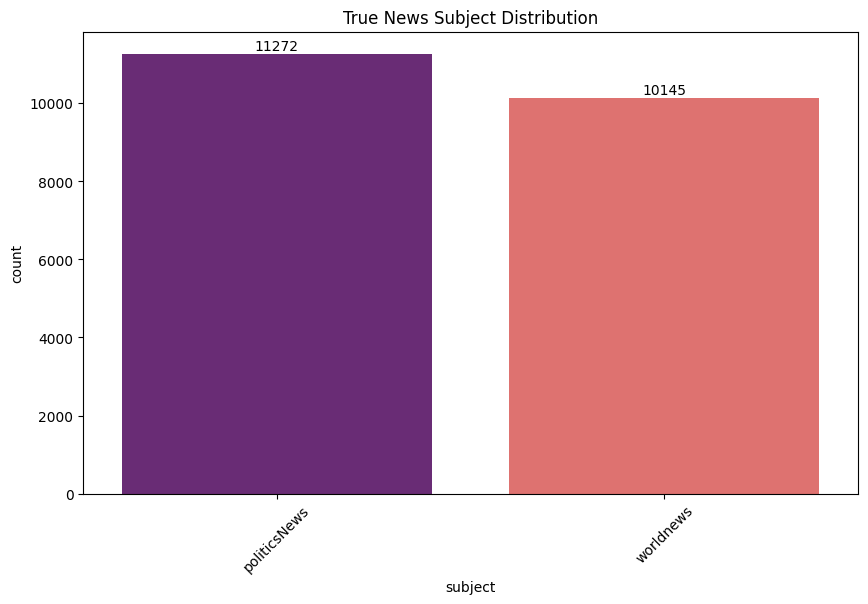

In [7]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=true_df, x='subject', hue='subject', palette='magma', legend=False)
plt.title('True News Subject Distribution')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 5),
                textcoords = 'offset points')
plt.show()

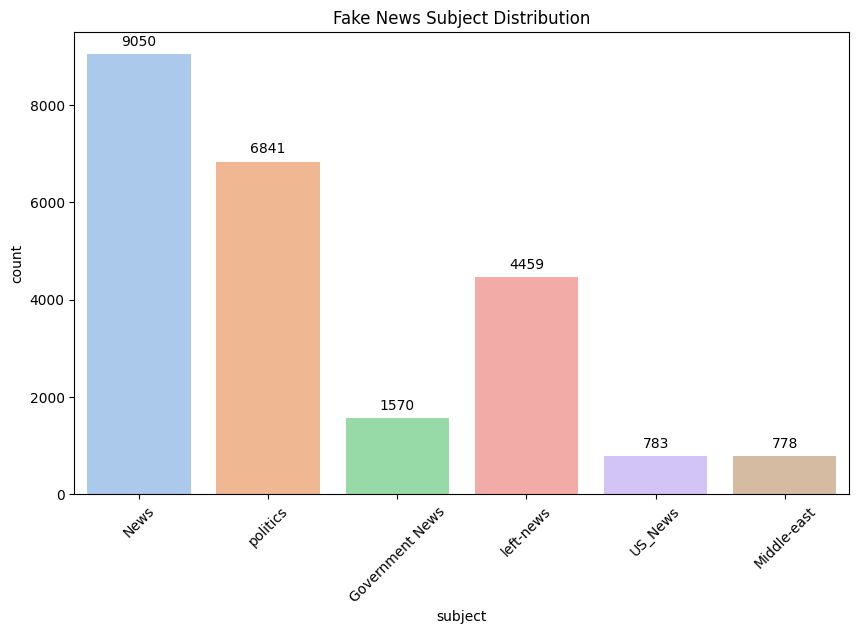

In [8]:
# Subject distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=fake_df, x='subject', hue='subject', palette='pastel', legend=False)
plt.title('Fake News Subject Distribution')
plt.xticks(rotation=45)

# Adding exact numbers on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

The code for plotting subject distributions typically follows these steps:

1.  **Calculate Subject Counts**: First, the code uses `value_counts()` on the `'subject'` column of your DataFrame (`fake_df` or `true_df`) to get the number of occurrences for each unique subject. This prepares the data for plotting.

    ```python
    subject_counts = fake_df['subject'].value_counts()
    ```

2.  **Initialize the Plot Figure**: `plt.figure(figsize=(10, 6))` creates a new figure for your plot and sets its size to 10 inches wide by 6 inches tall, ensuring good readability.

3.  **Create the Bar Plot**: This is where Seaborn comes in. You've used two primary functions:
    *   `sns.barplot()`: Used when you already have aggregated data (like `subject_counts.index` for subjects and `subject_counts.values` for their counts).
    *   `sns.countplot()`: A specialized bar plot for categorical data. It automatically calculates the counts of observations within each category, so you just provide the DataFrame and the categorical column (`x='subject'`).

    Both methods use `hue='subject'` (or `hue=subject_counts.index`) and `palette='your_palette_name'` (or `palette=sns.color_palette('pastel', 6)`) to assign distinct colors to each subject category. `legend=False` is used to hide the default legend since the colors are mapped directly to the x-axis labels.

    ```python
    # Example using sns.barplot
    sns.barplot(x=subject_counts.index, y=subject_counts.values, hue=subject_counts.index, palette=sns.color_palette('pastel', 6), legend=False)

    # Example using sns.countplot
    ax = sns.countplot(data=true_df, x='subject', hue='subject', palette='magma', legend=False)
    ```

4.  **Set Titles and Labels**: Standard Matplotlib functions are used to add context to your plot:
    *   `plt.title()`: Sets the main title of the plot (e.g., 'Fake News Subject Distribution').
    *   `plt.xlabel()` and `plt.ylabel()`: Label the x and y axes, respectively.
    *   `plt.xticks(rotation=45)`: Rotates the x-axis labels by 45 degrees, which is useful when category names are long and might overlap.

5.  **Annotate Bars with Exact Numbers**: This loop adds the numerical count on top of each bar for precise information:

    *   **For `sns.barplot` (using `plt.text`)**:
        ```python
        for index, value in enumerate(subject_counts):
            plt.text(index, value + 10, str(value), ha='center' )
        ```
        This iterates through the `subject_counts`, and for each bar, places text at its x-position (`index`), slightly above its height (`value + 10`), centered horizontally (`ha='center'`).

    *   **For `sns.countplot` (using `ax.annotate`)**:
        ```python
        for p in ax.patches:
            ax.annotate(format(p.get_height(), '.0f'),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha = 'center', va = 'center',
                        xytext = (0, 5),
                        textcoords = 'offset points')
        ```
        Here, `ax.patches` refers to the individual bars in the countplot. `p.get_height()` gives the bar's value, `p.get_x()` and `p.get_width()` help find its center, and `xytext` with `textcoords` adjusts the text position relative to the bar's top.

6.  **Display the Plot**: Finally, `plt.show()` renders the generated plot.

Displaying word cloud for fake news using color pallete =Magma

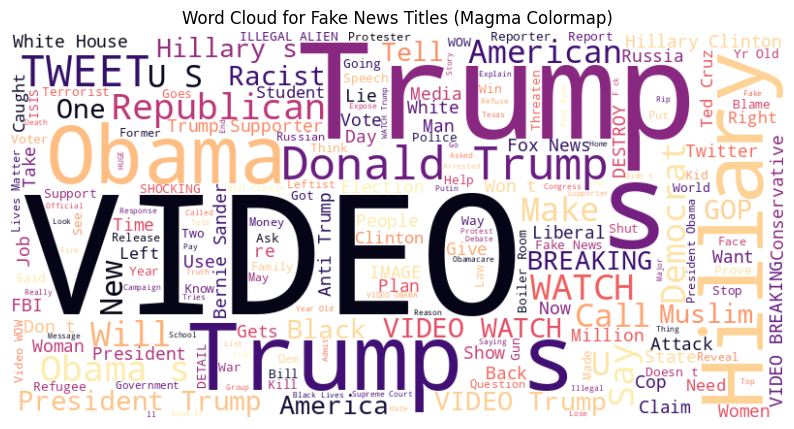

In [9]:
# Word cloud for fake news titles
fake_titles = ' '.join(fake_df['title'])
wordcloud_fake = WordCloud(width=800, height=400, background_color='white', colormap='magma').generate(fake_titles)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud for Fake News Titles (Magma Colormap)')
plt.axis('off')
plt.show()

Displaying True news word cloud without using color pallete ... Default

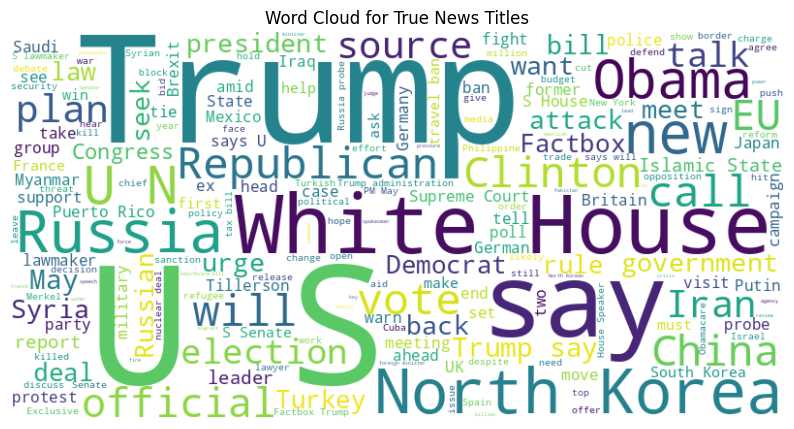

In [10]:
# Word cloud for true news titles
true_titles = ' '.join(true_df['title'])
wordcloud_true = WordCloud(width=800, height=400, background_color='white').generate(true_titles)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.title('Word Cloud for True News Titles')
plt.axis('off')
plt.show()

 ## Preprocessing
 Frist , we disp,lay the data into data frame, Now simply for future Preprocessing we will convert 2 folders into one

In [11]:
# Add labels
fake_df['label'] = 0   # 0 = Fake
true_df['label'] = 1   # 1 = Real


In [12]:
#display the data as dataframe

# Combine
df = pd.concat([fake_df, true_df], axis=0).reset_index(drop=True)

df.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


Displaying the text and title for lenght check , only one item display .

In [13]:
df['title'][0]

' Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing'

In [14]:
df['text'][0]

'Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t ev

we could see we text much larger than title ... we will clean some text for processing like removing punctuations extras which could change the meaning of our data.

In [15]:
# Remove special characters and punctuations
df['clean']= df['text'].apply(lambda x: re.sub('[^a-zA-Z0-9]', ' ', x))
# Convert to lowercase
df['clean'] = df['clean'].str.lower()
# Remove extra spaces
df['clean'] = df['clean'].apply(lambda x: re.sub(' +', ' ', x))

In [16]:
# remove stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df['clean'] = df['clean'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [17]:
df.head()

,title,text,subject,date,label,clean
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0,donald trump wish americans happy new year lea...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0,house intelligence committee chairman devin nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0,friday revealed former milwaukee sheriff david...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0,christmas day donald trump announced would bac...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0,pope francis used annual christmas day message...


In [18]:
print("\nInformation of Data")
df.info()


Information of Data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
 5   clean    44898 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


as we could se we have 23481 rows which do not have any NaN(not a number)
and 4 columns from which we are dropping columns

##Clean and Prepare


In [19]:
## dropping unnecessary columns or duplicates
df.drop(['subject', 'date', 'title'], axis=1, inplace=True, errors='ignore')
df.drop_duplicates(inplace=True)

we have dropped date too cause date is not used for classification(binary) model whereas ,for any other modeling we will convert time like in the below code:

In [20]:
# Convert date (for any other modeling)
#df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [21]:
 # Shuffle dataset
df = df.sample(frac=1, random_state=42).reset_index(drop=True)


##Split Features and Labels


In [22]:
# Labelling
X = df['text']   # main text
y = df['label']  # 0 = Fake, 1 = Real

In [23]:
# Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Baseline Model (TF‑IDF + Logistic Regression)

Why are we doing ML modelling ??
 checking the differences but not necessary for Deep learning Modelling(LSTM)

##Importing libraries for ML modelling and results

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt



In [25]:
# TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)



 The above code cell is crucial for preparing our text data (X_train and X_test) for machine learning models using a technique called TF-IDF (Term Frequency-Inverse Document Frequency) vectorization.
 in other words its changing text into numeric for ML modelling

In [26]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_tfidf, y_train)
y_pred_lr = lr.predict(X_test_tfidf)

print(classification_report(y_test, y_pred_lr))



              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3468
           1       0.98      0.99      0.98      4262

    accuracy                           0.98      7730
   macro avg       0.98      0.98      0.98      7730
weighted avg       0.98      0.98      0.98      7730



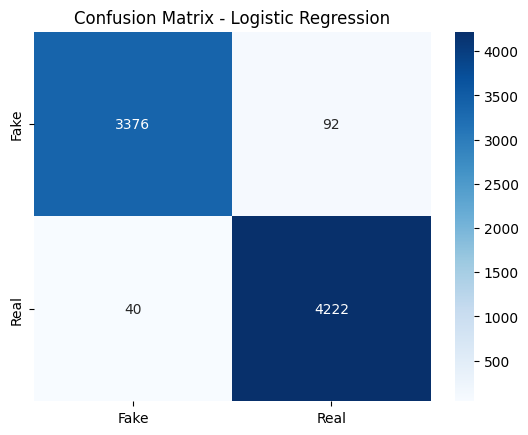

In [27]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake','Real'], yticklabels=['Fake','Real'])
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


so , we have results of ML modeling

**Note:** This part is not necessary for Deep learning modelling we just added a quick check

 Now, move into deep learning models
##LSTM Model (Sequence-based Deep Learning)_ Option 1 in deep learning

### Tokenization & Padding


In [28]:
#installing tensorflow keras
!pip install tensorflow
!pip install keras


In [29]:
# Importing Libraries
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout





Adding Early stopping to prevent overfitting and saving time

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',      # what to monitor (val_loss or val_accuracy)
    patience=3,              # number of epochs with no improvement before stopping
    restore_best_weights=True # roll back to the best model weights
)



In [31]:
# Parameters
max_words = 10000   # Vocabulary size
max_len = 300       # Max sequence length

# Tokenization
tokenizer = Tokenizer(num_words=max_words, oov_token="<unk>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

In [32]:
# Training the NLP(LSTM) model

# Build the LSTM model
model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    LSTM(128),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train with EarlyStopping
history = model.fit(
    X_train_pad, y_train,
    epochs=20,               # set a higher max epoch, early stopping will cut it short
    batch_size=64,
    validation_data=(X_test_pad, y_test),
    callbacks=[early_stop]   # add callback eary stopping here
)

Epoch 1/20
484/484 ━━━━━━━━━━━━━━━━━━━━ 35s 51ms/step - accuracy: 0.8322 - loss: 0.4092 - val_accuracy: 0.9755 - val_loss: 0.1199
Epoch 2/20
484/484 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.9501 - loss: 0.1483 - val_accuracy: 0.9797 - val_loss: 0.0750
Epoch 3/20
484/484 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - accuracy: 0.9563 - loss: 0.1298 - val_accuracy: 0.9715 - val_loss: 0.0974
Epoch 4/20
484/484 ━━━━━━━━━━━━━━━━━━━━ 15s 30ms/step - accuracy: 0.9096 - loss: 0.2170 - val_accuracy: 0.9803 - val_loss: 0.0771
Epoch 5/20
484/484 ━━━━━━━━━━━━━━━━━━━━ 18s 37ms/step - accuracy: 0.9861 - loss: 0.0524 - val_accuracy: 0.9855 - val_loss: 0.0501
Epoch 6/20
484/484 ━━━━━━━━━━━━━━━━━━━━ 15s 31ms/step - accuracy: 0.9925 - loss: 0.0264 - val_accuracy: 0.9875 - val_loss: 0.0430
Epoch 7/20
484/484 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.9951 - loss: 0.0173 - val_accuracy: 0.9904 - val_loss: 0.0363
Epoch 8/20
484/484 ━━━━━━━━━━━━━━━━━━━━ 12s 24ms/step - accuracy: 0.9984 - loss: 0.0082 - 

**Note:** - restore_best_weights=True ensures you don’t end up with the last (possibly worse) epoch.


This Process is Extremely Lenghty and its like a endless loop and changes the readings each time  ... i do use Early stopping but i notice that every time the readings changed . At very frist time i notice it took a lenghty time ..so, i used Eary stopping which at frist stop at 4 epochs than on 10 than on 14 , than 0n 16 and Now at 19 epochs

* When we changed the runtime type to GPU instead of CPU it runs faster... BINGO ... and NOw its 14 epochs

In [33]:
# Evaluate
y_pred_lstm = (model.predict(X_test_pad) > 0.5).astype("int32")
print(classification_report(y_test, y_pred_lstm))


242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3468
           1       0.99      0.99      0.99      4262

    accuracy                           0.99      7730
   macro avg       0.99      0.99      0.99      7730
weighted avg       0.99      0.99      0.99      7730



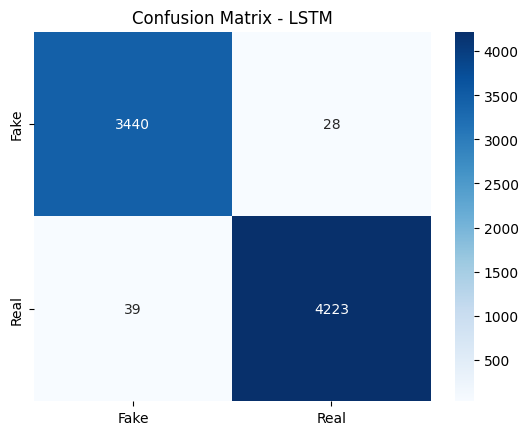

In [34]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lstm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake','Real'], yticklabels=['Fake','Real'])
plt.title("Confusion Matrix - LSTM")
plt.show()



In [35]:
# Add  imports
from sklearn.metrics import roc_curve, auc

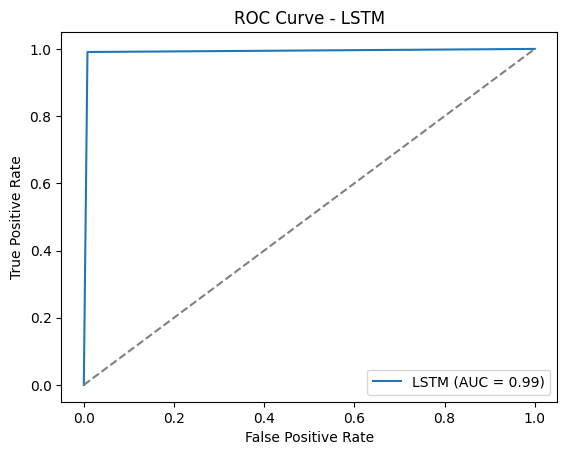

In [36]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_lstm)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'LSTM (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LSTM')
plt.legend()
plt.show()


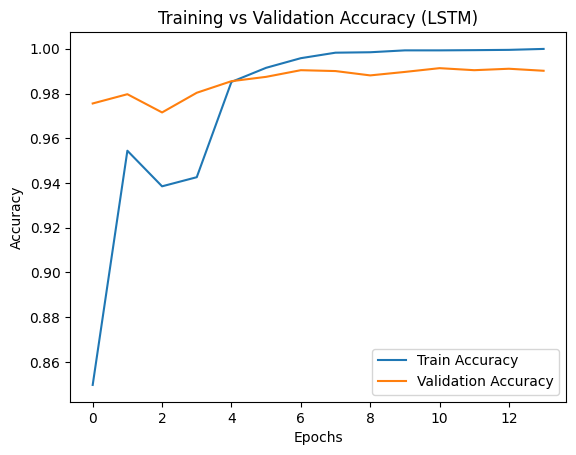

In [37]:
# Training vs Validation Accuracy/Loss
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Training vs Validation Accuracy (LSTM)")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


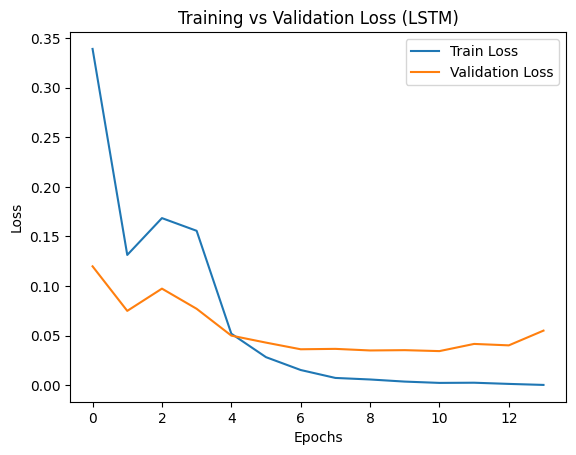

In [38]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training vs Validation Loss (LSTM)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


Now moving towards Option 2 in deep learning modelling


## Transformer Model (DistilBERT Fine-Tuning)

install transformers datasets

In [39]:
!pip install transformers
!pip install datasets



Importing Libraries from transformers

In [40]:
from transformers import DistilBertTokenizerFast, TFDistilBertForSequenceClassification
from transformers import Trainer, TrainingArguments
from datasets import Dataset


In [41]:
# Convert to Hugging Face Dataset
train_data = Dataset.from_pandas(pd.DataFrame({'text': X_train, 'label': y_train}))
test_data = Dataset.from_pandas(pd.DataFrame({'text': X_test, 'label': y_test}))


Tokenize





In [42]:
from transformers import DistilBertTokenizerFast

tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")

def tokenize_function(examples):
    # Tokenize the 'text' column from the dataset
    return tokenizer(examples["text"], truncation=True, padding="max_length")

# Apply the tokenization to your training and testing datasets
train_data = train_data.map(tokenize_function, batched=True)
test_data = test_data.map(tokenize_function, batched=True)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Map:   0%|          | 0/30917 [00:00<?, ? examples/s]

Map:   0%|          | 0/7730 [00:00<?, ? examples/s]

This code is a crucial step for preparing your data to be used with models from the Hugging Face transformers library, specifically for fine-tuning.

Training Setup





In [45]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=test_data,   #  assuming eval_data refers to test_data
)



AttributeError: 'Sequential' object has no attribute 'to'

In [46]:
from transformers import TFDistilBertForSequenceClassification

# Instantiate the DistilBERT model for sequence classification
bert_model = TFDistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


TypeError: 'builtins.safe_open' object is not iterable

we could simply solve this error by importing older version of tensorflow as it supported tensorflow weights


```
pip install transformers==4.38.0

```

but we did not do that instead we use  the PyTorch version of the model:

In [48]:
from transformers import DistilBertForSequenceClassification

bert_model = DistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=2
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [56]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [57]:
from transformers import Trainer, TrainingArguments

training_args = TrainingArguments(
    output_dir="./results",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    report_to="none" # Explicitly disable reporting to all integrations, including wandb
)

trainer = Trainer(
    model=bert_model, # Use the newly instantiated DistilBERT model
    args=training_args,
    train_dataset=train_data,
    eval_dataset=test_data,
)

Train






i run the above code to disabled WANDB to avoid API Keys need cause we actually do not need to do in this case ,
and Additionally we use tensorboard local login tools down :

In [58]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

In [59]:
trainer.train()

Step,Training Loss
500,0.005100
1000,0.002200
1500,0.000000
2000,0.004100
2500,0.000000
3000,0.000100
3500,0.002500
4000,0.000500
4500,0.000100
5000,0.000200


TrainOutput(global_step=5799, training_loss=0.0012784963106103131, metrics={'train_runtime': 4540.9986, 'train_samples_per_second': 20.425, 'train_steps_per_second': 1.277, 'total_flos': 1.2286483692742656e+16, 'train_loss': 0.0012784963106103131, 'epoch': 3.0})

Now we could see it is taking time to execute even in GPU runtime type

WE can also tell Hugging Face Trainer to use TensorBoard or CSV logging instead of wandb:


-


In [ ]:
##training_args = TrainingArguments(
##    output_dir="./results",
##    logging_dir="./logs",
##    report_to="none",   # disables wandb
##    logging_strategy="steps",
##    logging_steps=50,
##    num_train_epochs=3,
##    per_device_train_batch_size=16,
##    evaluation_strategy="epoch"
##)

- Best path: Disable wandb (WANDB_DISABLED=true or report_to="none").
when we are not using API

Evaluate & Save

In [60]:
trainer.evaluate()
trainer.save_model("./fake_news_model")

In [61]:
# Predictions (example: using trainer.predict)
preds = trainer.predict(test_data)
y_pred_bert = preds.predictions.argmax(axis=1)



In [62]:
# Classification Report
print(" DistilBERT Results")
print(classification_report(y_test, y_pred_bert))



 DistilBERT Results
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3468
           1       1.00      1.00      1.00      4262

    accuracy                           1.00      7730
   macro avg       1.00      1.00      1.00      7730
weighted avg       1.00      1.00      1.00      7730



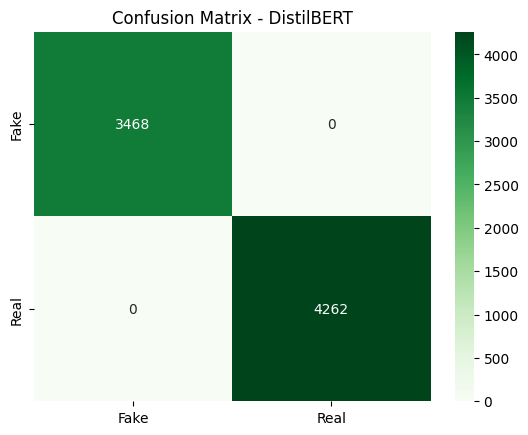

In [63]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_bert)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Fake','Real'], yticklabels=['Fake','Real'])
plt.title("Confusion Matrix - DistilBERT")
plt.show()



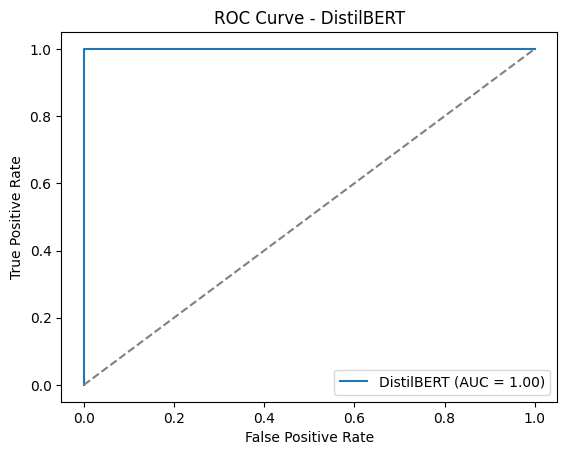

In [64]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_bert)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'DistilBERT (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - DistilBERT')
plt.legend()
plt.show()

## Unified Evaluation & Visualization
We want a common evaluation function so all models are compared consistently:



In [65]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_model(y_true, y_pred, model_name):
    print(f"Results for {model_name}")
    print(classification_report(y_true, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Fake','Real'], yticklabels=['Fake','Real'])
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0,1],[0,1],'--',color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend()
    plt.show()

Results for Logistic Regression
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      3468
           1       0.98      0.99      0.98      4262

    accuracy                           0.98      7730
   macro avg       0.98      0.98      0.98      7730
weighted avg       0.98      0.98      0.98      7730



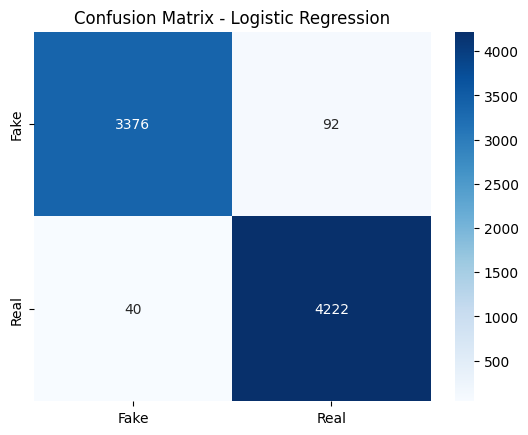

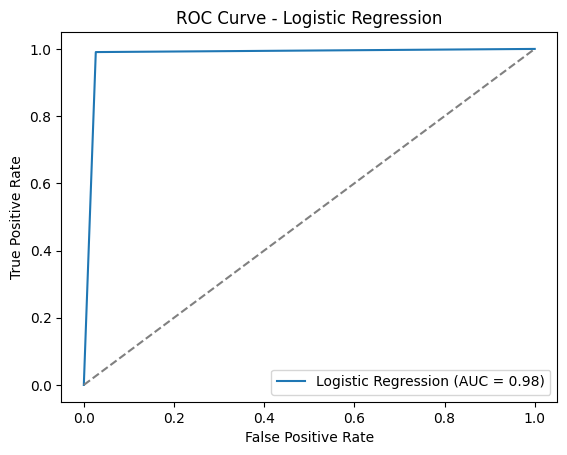

In [66]:
evaluate_model(y_test, y_pred_lr, "Logistic Regression")


Results for LSTM
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3468
           1       0.99      0.99      0.99      4262

    accuracy                           0.99      7730
   macro avg       0.99      0.99      0.99      7730
weighted avg       0.99      0.99      0.99      7730



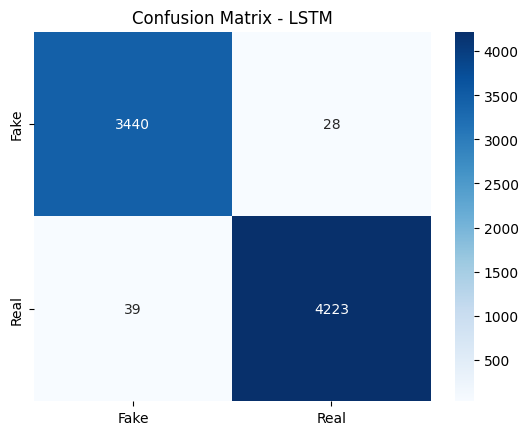

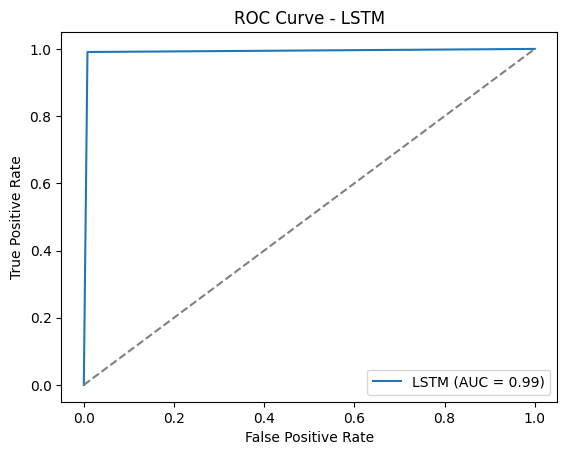

In [67]:
evaluate_model(y_test, y_pred_lstm, "LSTM")


Results for DistilBERT
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3468
           1       1.00      1.00      1.00      4262

    accuracy                           1.00      7730
   macro avg       1.00      1.00      1.00      7730
weighted avg       1.00      1.00      1.00      7730



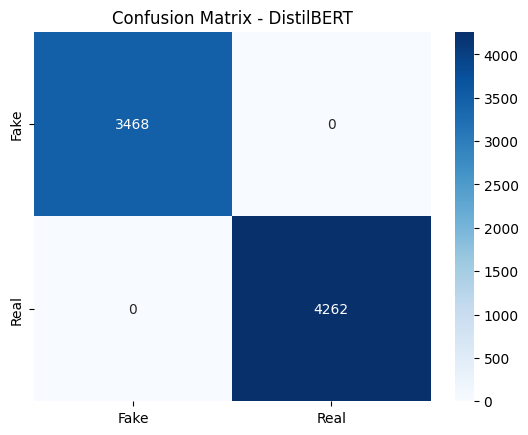

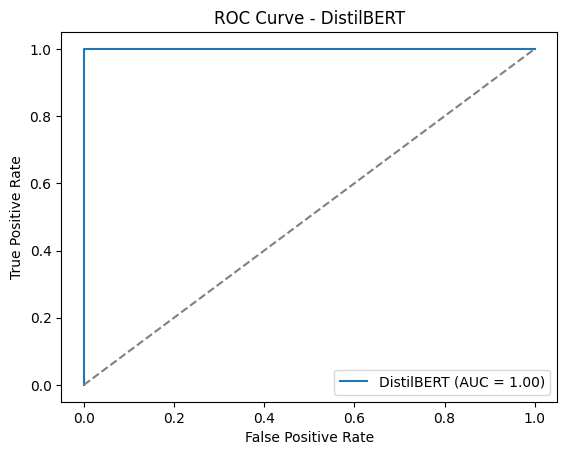

In [68]:
evaluate_model(y_test, y_pred_bert, "DistilBERT")


###Collect Results
After training each model, store their evaluation metrics (accuracy, F1, AUC):


In [69]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# Logistic Regression
acc_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_pred_lr)

# LSTM
acc_lstm = accuracy_score(y_test, y_pred_lstm)
f1_lstm = f1_score(y_test, y_pred_lstm)
auc_lstm = roc_auc_score(y_test, y_pred_lstm)

# DistilBERT
acc_bert = accuracy_score(y_test, y_pred_bert)
f1_bert = f1_score(y_test, y_pred_bert)
auc_bert = roc_auc_score(y_test, y_pred_bert)

###Create a Summary Table


In [70]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Logistic Regression", "LSTM", "DistilBERT"],
    "Accuracy": [acc_lr, acc_lstm, acc_bert],
    "F1 Score": [f1_lr, f1_lstm, f1_bert],
    "AUC": [auc_lr, auc_lstm, auc_bert]
})

print(results)

                 Model  Accuracy  F1 Score       AUC
0  Logistic Regression  0.982924  0.984608  0.982043
1                 LSTM  0.991332  0.992130  0.991388
2           DistilBERT  1.000000  1.000000  1.000000


###Visualize Comparison



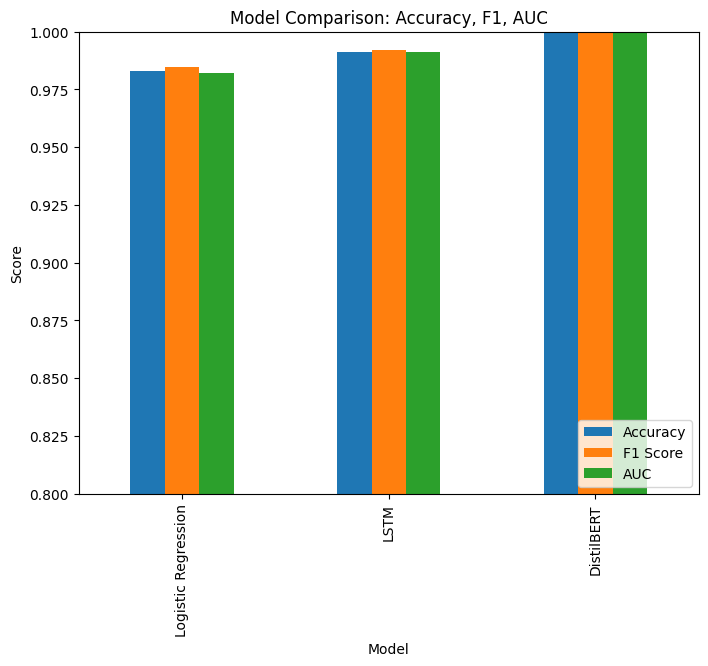

In [71]:
results.set_index("Model").plot(kind="bar", figsize=(8,6))
plt.title("Model Comparison: Accuracy, F1, AUC")
plt.ylabel("Score")
plt.ylim(0.8,1.0)
plt.legend(loc="lower right")
plt.show()

# Conclusion

In this notebook, we:
1. **Prepared the dataset** by merging fake and true news articles, cleaning text, and creating labels.  
2. **Built three models**:
   - Logistic Regression (TF‑IDF baseline)
   - LSTM (deep learning sequence model with EarlyStopping)
   - DistilBERT (transformer fine‑tuning)  
3. **Evaluated all models** using accuracy, F1 score, confusion matrices, and ROC curves.  
4. **Compared results side‑by‑side** in a summary table and bar chart.

**Key Insight:**  
- Logistic Regression provides a strong baseline.  
- LSTM improves performance by modeling word sequences.  
- DistilBERT achieves the best results, showing the power of transformers in NLP.  

This workflow demonstrates an end‑to‑end approach to fake news detection, combining classical ML, deep learning, and modern transformers into a unified case study.